In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.5 MB/s eta 0:00:00


In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import pandas as pd
wisconsin_df=pd.read_csv('/content/drive/MyDrive/ML Dataset/Cancer.csv')
wisconsin_df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

wisconsin_df['diagnosis']=wisconsin_df['diagnosis'].map({"M":1,"B":0})
wisconsin_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
wisconsin_df_scaled=pd.DataFrame(preprocessing.scale( wisconsin_df.iloc[:,1:32]),columns=wisconsin_df.columns[1:32])
x=wisconsin_df_scaled.values
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(verbose=1,perplexity=40,max_iter=4000)
Y=tsne.fit_transform(x)
Y

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.175404
[t-SNE] KL divergence after 2200 iterations: 0.864987


array([[ 21.773745 , -13.7551365],
       [ 16.899721 ,  -5.547338 ],
       [ 20.15248  , -10.796042 ],
       ...,
       [  9.959854 ,  -8.506341 ],
       [ 20.472239 , -14.580139 ],
       [-21.178932 ,  -1.7526385]], dtype=float32)

In [ ]:
import numpy as np
kmns=KMeans(n_clusters=2,init="k-means++",n_init=50,max_iter=300,tol=0.0001)
kY=kmns.fit_predict(x)
print(kY)
print(np.array(wisconsin_df['diagnosis']))

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

Text(0.5, 1.0, 'Random Clustering Plot')

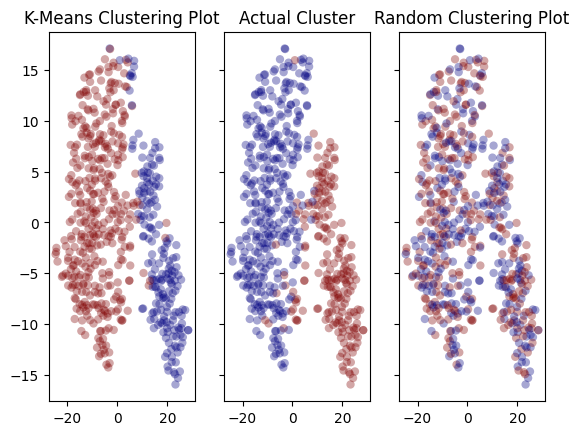

In [ ]:
ytest = np.random.choice([0, 1], size=569)
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True)
ax1.scatter(Y[:,0],Y[:,1],c=kY,cmap='jet',edgecolor='None',alpha=0.35)
ax1.set_title('K-Means Clustering Plot')
ax2.scatter(Y[:,0],Y[:,1],c=wisconsin_df['diagnosis'],cmap='jet',edgecolor='None',alpha=0.35)
ax2.set_title('Actual Cluster')
ax3.scatter(Y[:,0],Y[:,1],c=ytest,cmap='jet',edgecolor='None',alpha=0.35)
ax3.set_title('Random Clustering Plot')

In [ ]:
kmedoids=KMedoids(n_clusters=2,random_state=42)
kY=kmedoids.fit_predict(x)

Text(0.5, 1.0, 'Actual Cluster')

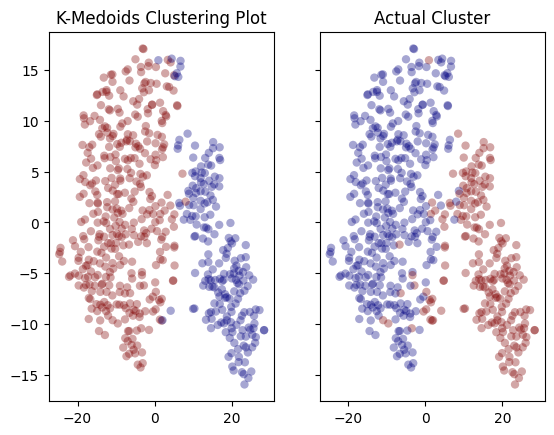

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(Y[:,0],Y[:,1],c=kY,cmap='jet',edgecolor='None',alpha=0.35)
ax1.set_title('K-Medoids Clustering Plot')
ax2.scatter(Y[:,0],Y[:,1],c=wisconsin_df['diagnosis'],cmap='jet',edgecolor='None',alpha=0.35)
ax2.set_title('Actual Cluster')

In [ ]:
agglo=AgglomerativeClustering(n_clusters=2,linkage="ward")
kY=agglo.fit_predict(x)

Text(0.5, 1.0, 'Actual Cluster')

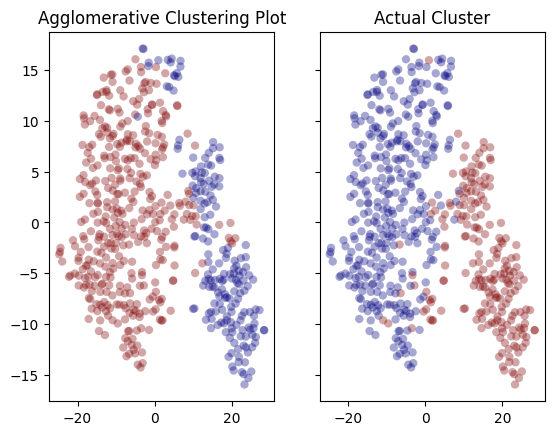

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(Y[:,0],Y[:,1],c=kY,cmap='jet',edgecolor='None',alpha=0.35)
ax1.set_title('Agglomerative Clustering Plot')
ax2.scatter(Y[:,0],Y[:,1],c=wisconsin_df['diagnosis'],cmap='jet',edgecolor='None',alpha=0.35)
ax2.set_title('Actual Cluster')